In [2]:
#Below is the list of libraries that were used
import csv
import numpy as np
import pandas as pd 
import math

#Plotting
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

#NLTK toolkit
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('punkt')

#Machine learning 
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.manifold import TSNE

#Model validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/parthpatel/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/parthpatel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
tweets = pd.read_csv('tweets.csv') #president tweets
#display(tweets.head(40)) 
tweets = tweets.rename(columns={'created_at':'Date'})
tweets['text'] = tweets['text'].apply(str)
tweets['Date'] = pd.to_datetime(tweets['Date'], errors='coerce').dt.date #convert dates from str to regular dates
tweets.head()

,source,text,Date,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,RT @realDonaldTrump: “Congressman Adam Schiff ...,2019-10-14,19697.0,0,true,1.183549e+18
1,Twitter for iPhone,RT @realDonaldTrump: .....BY THE WAY DON’T CAL...,2019-10-14,18997.0,0,true,1.183549e+18
2,Twitter for iPhone,“Serial killers get more Due Process than the ...,2019-10-14,19867.0,74617,false,1.183541e+18
3,Twitter for iPhone,Somebody please explain to Chris Wallace of Fo...,2019-10-14,26122.0,106477,false,1.183535e+18
4,Twitter for iPhone,The U.S. has the worst of the ISIS prisoners. ...,2019-10-13,16861.0,67151,false,1.183525e+18


# Tweet Text EDA

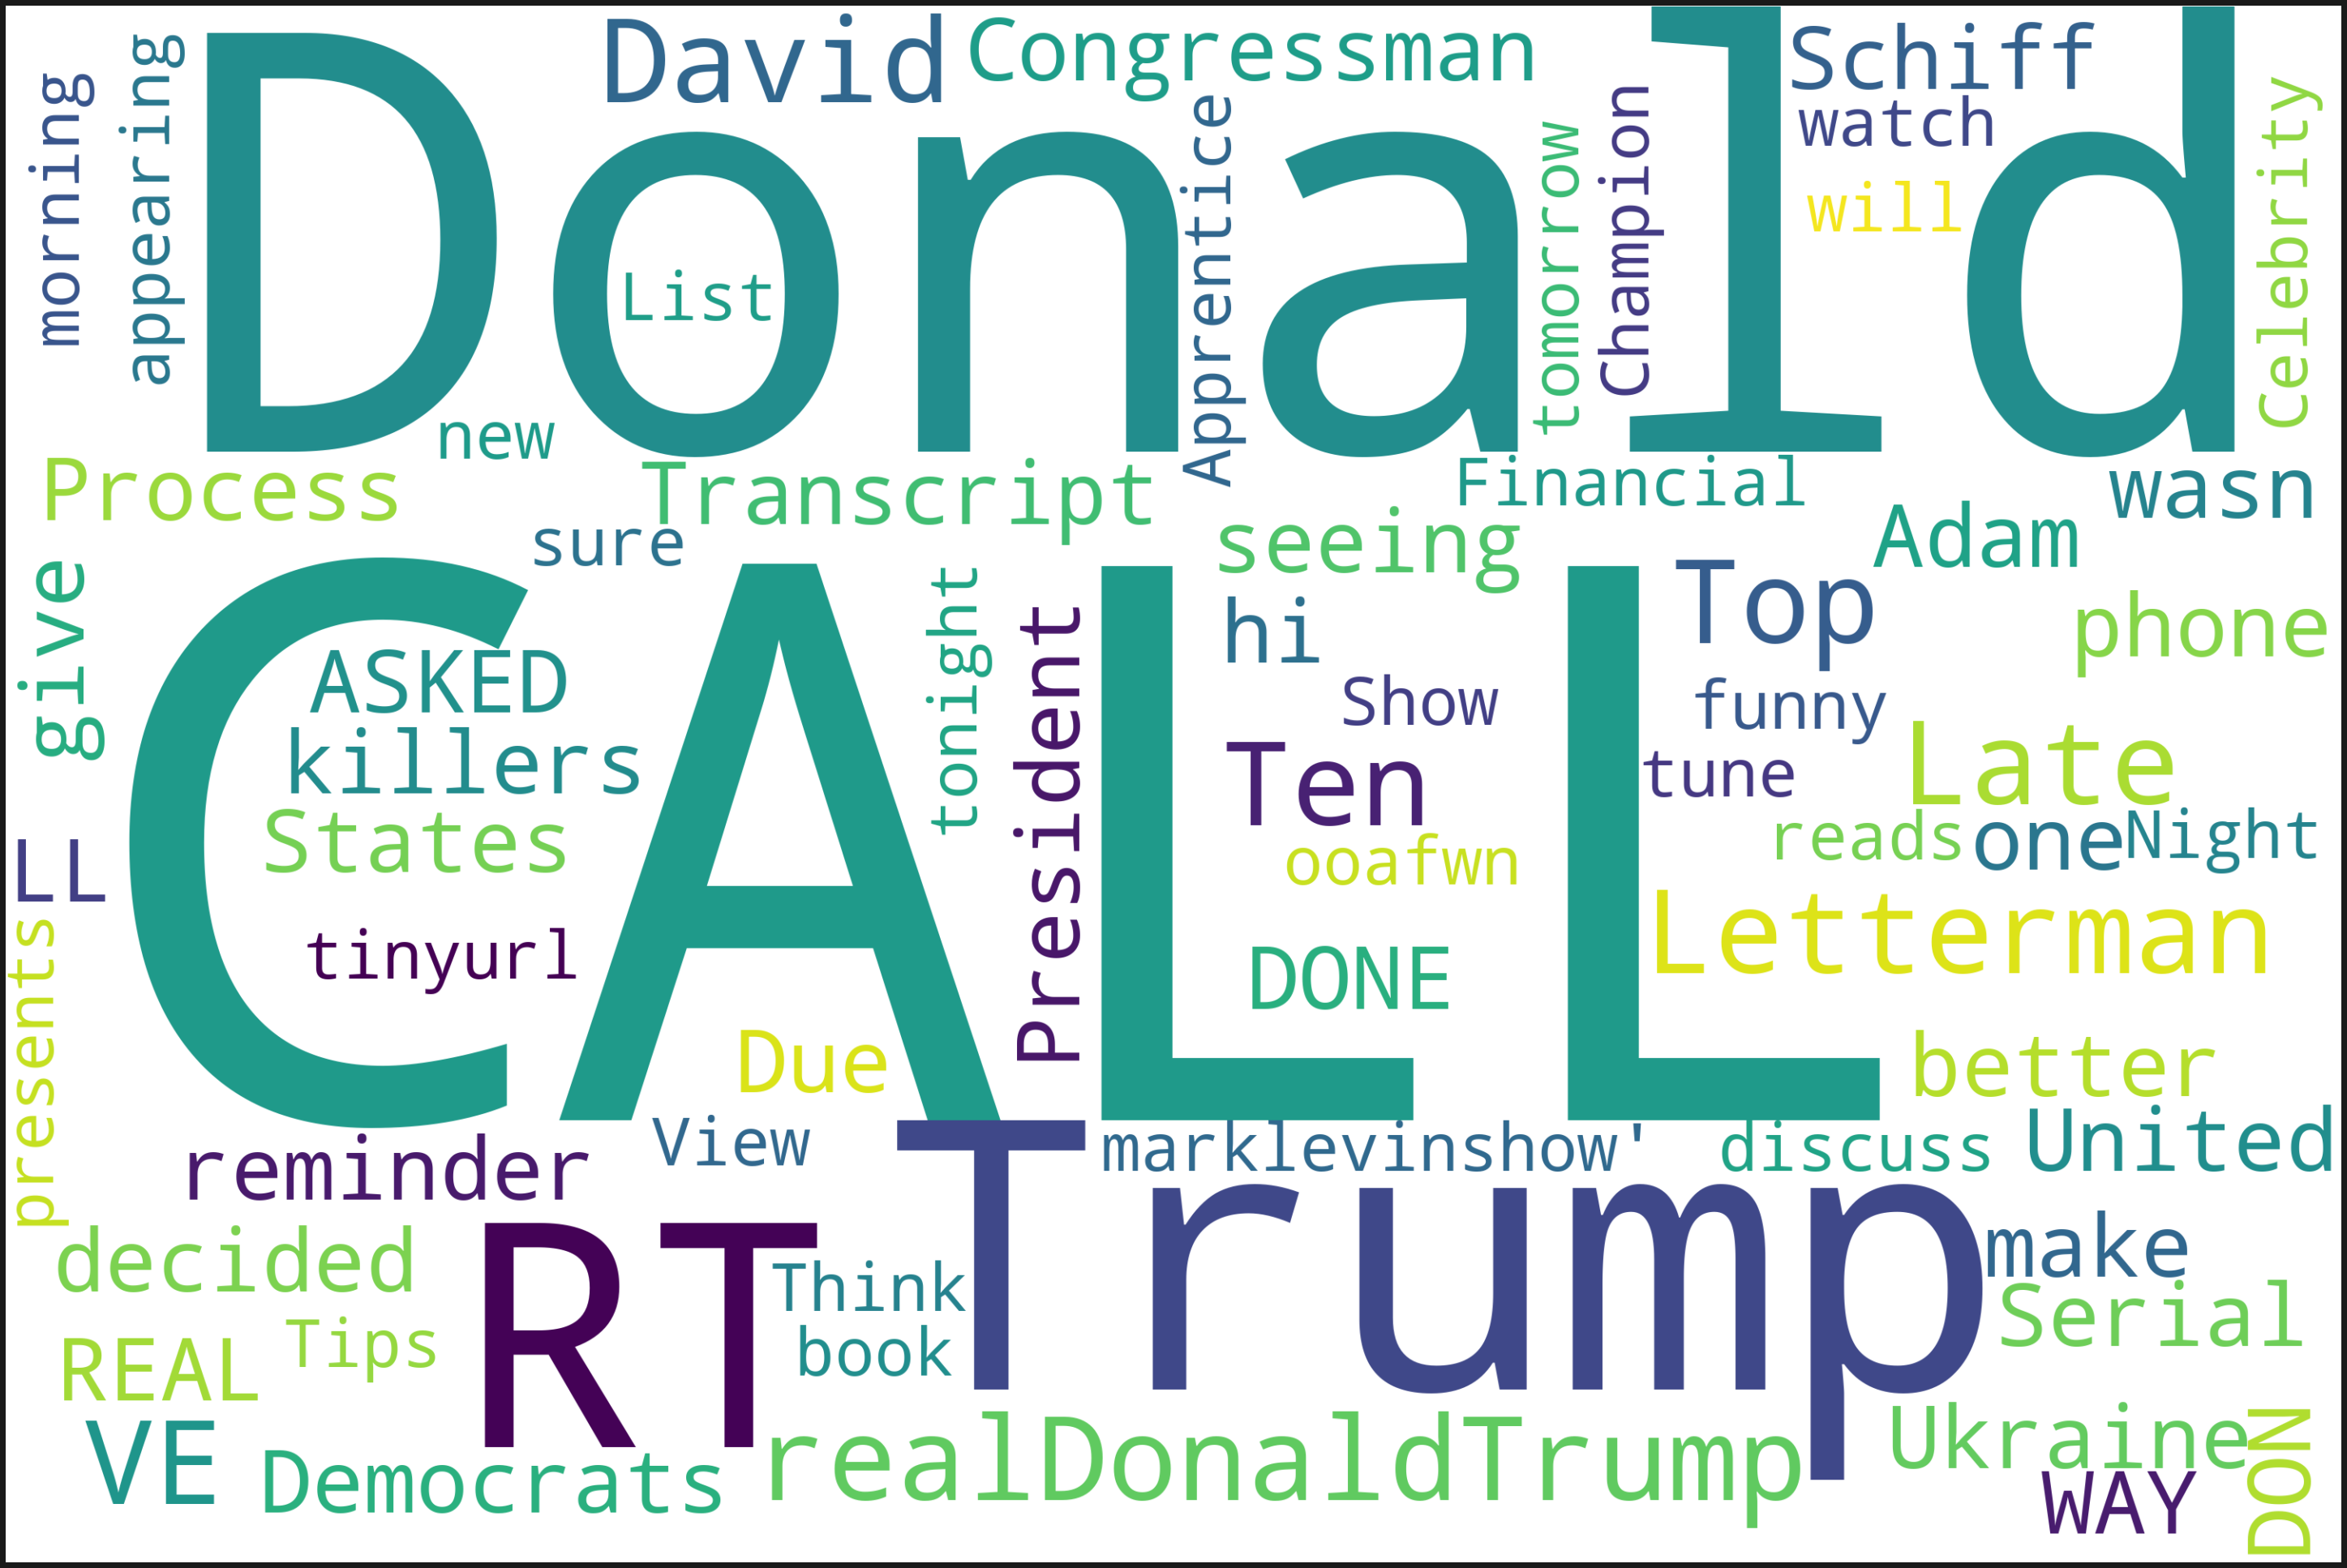

In [5]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(tweets.text.values))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()